In [75]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import researchpy as rp
import matplotlib.pyplot as plt

In [25]:
df = pd.read_excel("clinical_selec.xlsx")

In [26]:
df.head()

,id,Gender,Race,Ethnicity,idade_dias,primeiro_evento,sobrevida_evento,status,sobrevida_global,leucocitos,blastos_mo,blasto_sangue,SNC,idade,sobrevida_evento_meses,sobrevida_global_meses
0,SA1,Female,White,Hispanic or Latino,5160,Relapse,629,Alive,1976,35.2,25.0,0.0,Yes,14,20.97,65.87
1,SA2,Male,White,Not Hispanic or Latino,648,Relapse,468,Alive,1674,5.9,27.0,0.0,Yes,2,15.60,55.80
2,SA3,Male,White,Not Hispanic or Latino,348,Induction failure,61,Alive,1601,38.9,30.0,0.0,Yes,1,2.03,53.37
3,SA4,Female,White,Hispanic or Latino,6308,Censored,2085,Alive,2085,5.4,44.0,0.0,Yes,17,69.50,69.50
4,SA5,Female,White,Not Hispanic or Latino,492,Censored,0,Alive,3,12.7,1.5,0.0,Yes,1,0.00,0.10


Analisando as distribuições das váriaveis númericas para verificar quais testes estatiscos usar para comparar os grupos! 

c:\Users\carol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.9377979040145874, pvalue=6.187301717473786e-17)

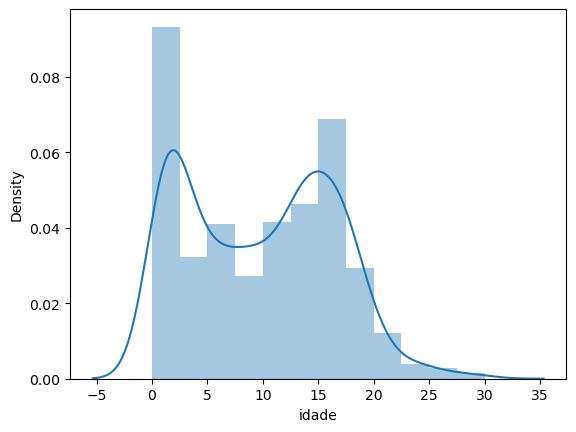

In [27]:
sns.distplot(df["idade"])
stats.shapiro(df["idade"])

c:\Users\carol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.8432438373565674, pvalue=2.857762336067032e-26)

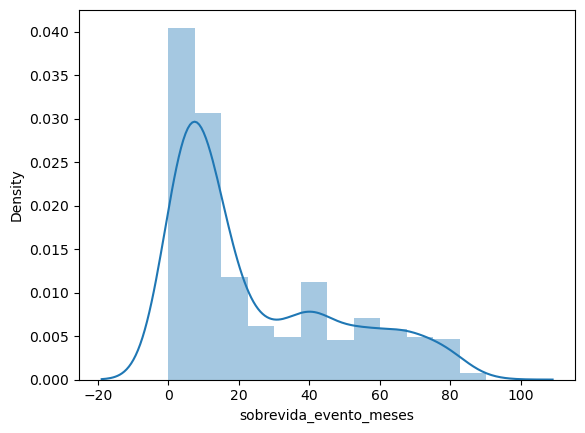

In [29]:
sns.distplot(df["sobrevida_evento_meses"])
stats.shapiro(df["sobrevida_evento_meses"])

c:\Users\carol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.9292436242103577, pvalue=4.183853068513612e-18)

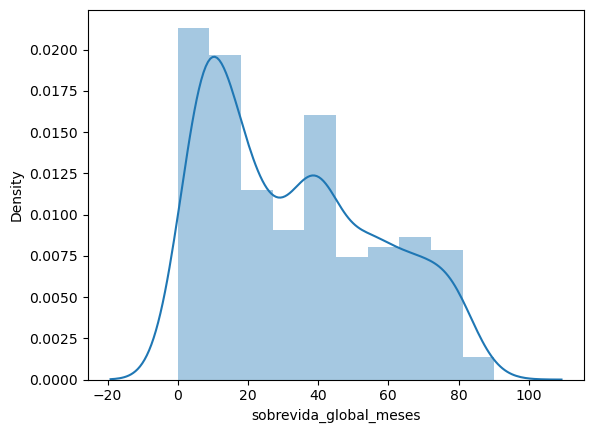

In [30]:
sns.distplot(df["sobrevida_global_meses"])
stats.shapiro(df["sobrevida_global_meses"])

c:\Users\carol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.6360594034194946, pvalue=1.0838991156937956e-36)

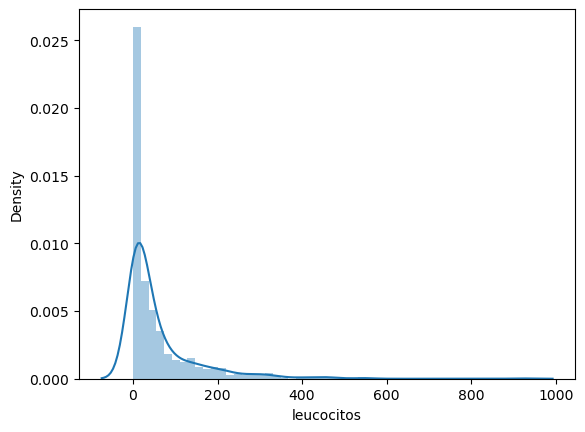

In [31]:
sns.distplot(df["leucocitos"])
stats.shapiro(df["leucocitos"])

c:\Users\carol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.9275517463684082, pvalue=2.5258909194059605e-18)

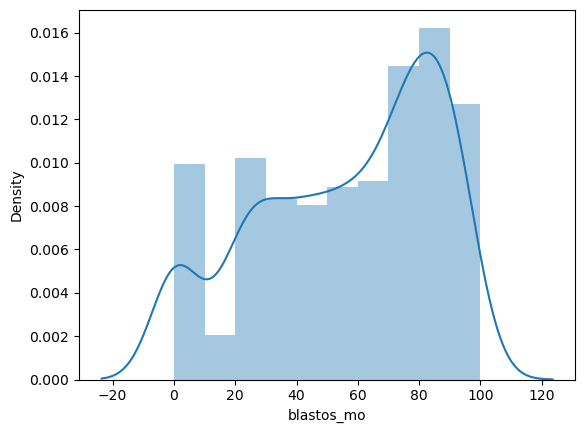

In [32]:
sns.distplot(df["blastos_mo"])
stats.shapiro(df["blastos_mo"])

c:\Users\carol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.9179180860519409, pvalue=1.6624169302965561e-19)

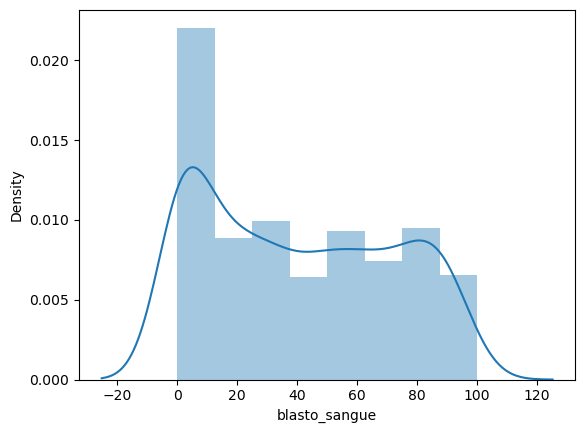

In [33]:
sns.distplot(df["blasto_sangue"])
stats.shapiro(df["blasto_sangue"])

O shapiro foi significativo indicando que a distribuição da váriavel idade não é normal

In [43]:
stats.mannwhitneyu(df['idade'][df['status'] == 'Alive'],
                   df['idade'][df['status'] == 'Dead'])

MannwhitneyuResult(statistic=74655.5, pvalue=0.008803176054089947)

In [42]:
stats.mannwhitneyu(df['leucocitos'][df['status'] == 'Alive'],
                   df['leucocitos'][df['status'] == 'Dead'])

MannwhitneyuResult(statistic=59214.0, pvalue=0.005565373868420829)

In [44]:
stats.mannwhitneyu(df['blastos_mo'][df['status'] == 'Alive'],
                   df['blastos_mo'][df['status'] == 'Dead'])

MannwhitneyuResult(statistic=65811.0, pvalue=0.6376660831017036)

In [45]:
stats.mannwhitneyu(df['blasto_sangue'][df['status'] == 'Alive'],
                   df['blasto_sangue'][df['status'] == 'Dead'])

MannwhitneyuResult(statistic=63651.5, pvalue=0.22035304541946543)

In [53]:
gender = pd.crosstab(df["Gender"], df["status"])

print(gender)

stats.chisquare(gender, axis=None)

status  Alive  Dead
Gender             
Female    175   171
Male      191   196


Power_divergenceResult(statistic=2.4051841746248295, pvalue=0.4926703198281752)

In [69]:
Race = pd.crosstab(df["Race"], df["status"])

print(Race)

res=stats.chi2_contingency(Race)
print(res)


status                                     Alive  Dead
Race                                                  
American Indian or Alaska Native               3     3
Asian                                         20    21
Black or African American                     42    49
Native Hawaiian or other Pacific Islander      3     1
Unknown                                       44    36
White                                        254   257
(2.3791044783247286, 0.7945817570010952, 5, array([[  2.99590723,   3.00409277],
       [ 20.47203274,  20.52796726],
       [ 45.43792633,  45.56207367],
       [  1.99727149,   2.00272851],
       [ 39.94542974,  40.05457026],
       [255.15143247, 255.84856753]]))


In [68]:
Ethnicity = pd.crosstab(df["Ethnicity"], df["status"])

print(Ethnicity)

res=stats.chi2_contingency(Ethnicity)
print(res)


status                  Alive  Dead
Ethnicity                          
Hispanic or Latino         58    70
Not Hispanic or Latino    292   288
Unknown                    16     9
(3.111227741020162, 0.21105977949077165, 2, array([[ 63.91268759,  64.08731241],
       [289.60436562, 290.39563438],
       [ 12.48294679,  12.51705321]]))


In [71]:
primeiro_evento = pd.crosstab(df["primeiro_evento"], df["status"])

print(primeiro_evento)

res=stats.chi2_contingency(primeiro_evento)
print(res)


status                   Alive  Dead
primeiro_evento                     
Censored                   261     0
Death                        0    57
Death without remission      0    19
Induction failure           15    53
Relapse                     90   238
(425.0152087025424, 1.0927817044554274e-90, 4, array([[130.32196453, 130.67803547],
       [ 28.46111869,  28.53888131],
       [  9.48703956,   9.51296044],
       [ 33.95361528,  34.04638472],
       [163.77626194, 164.22373806]]))


In [72]:
SNC = pd.crosstab(df["SNC"], df["status"])

print(SNC)

res=stats.chi2_contingency(SNC)
print(res)

status   Alive  Dead
SNC                 
No           0     2
Unknown     10    18
Yes        356   347
(4.399578701352756, 0.11082650143121259, 2, array([[  0.99863574,   1.00136426],
       [ 13.98090041,  14.01909959],
       [351.02046385, 351.97953615]]))


Separando as variaveis númericas da categoricas

In [74]:
categorica = df[['Gender', "Race", "Ethnicity", "primeiro_evento", "SNC"]]
numerica = df[["leucocitos", "blastos_mo", "blasto_sangue", "idade", "sobrevida_evento_meses", "sobrevida_global_meses"]]

[Text(0.5, 1.0, 'Matrix de correlação variáveis númericas\n')]

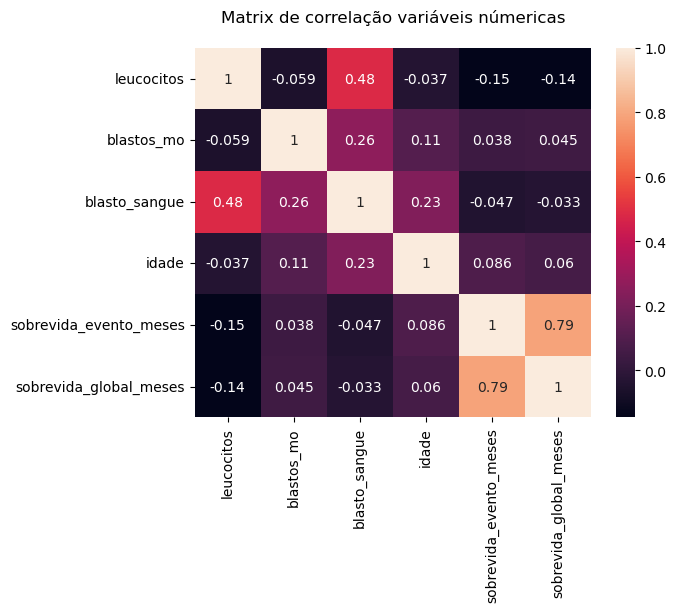

In [80]:
correlation_mat = numerica.corr()
heatmap=sns.heatmap(correlation_mat, annot = True)
heatmap.set ( title = "Matrix de correlação variáveis númericas\n") 